***Implementação*** 

As linhas de código abaixo incluem as bibliotecas utilizadas e a criação das pastas utilizadas para separar as fotos com e sem qr codes.

In [1]:
%matplotlib widget
import pathlib
import os

import cv2
from matplotlib import pyplot as plt
import numpy as np

base_path = pathlib.Path().resolve()
imgs_path = base_path / "images"

pathlib.Path("detected").mkdir(parents=True, exist_ok=True)
pathlib.Path("failed").mkdir(parents=True, exist_ok=True)

failed_path = base_path / "failed"
detected_path = base_path / "detected"



Na celula abaixo configuramos o tamanho e o numero de boards e tambem o tamanho das celulas.
O dicionario e a criação do board também são relizadas nessa célula.

In [2]:
# 28cm = 11,0236
#  at 300dpi
dpcm = 300 * 0.393701
# 46cm = 18,1102
cell_size=10000
num_boards = 4
m, n = 3, 5

dictionary = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_5X5_1000)
board = cv2.aruco.CharucoBoard_create(m, n, .09, .075, dictionary)
params = cv2.aruco.DetectorParameters_create()



Imagens antes do script:
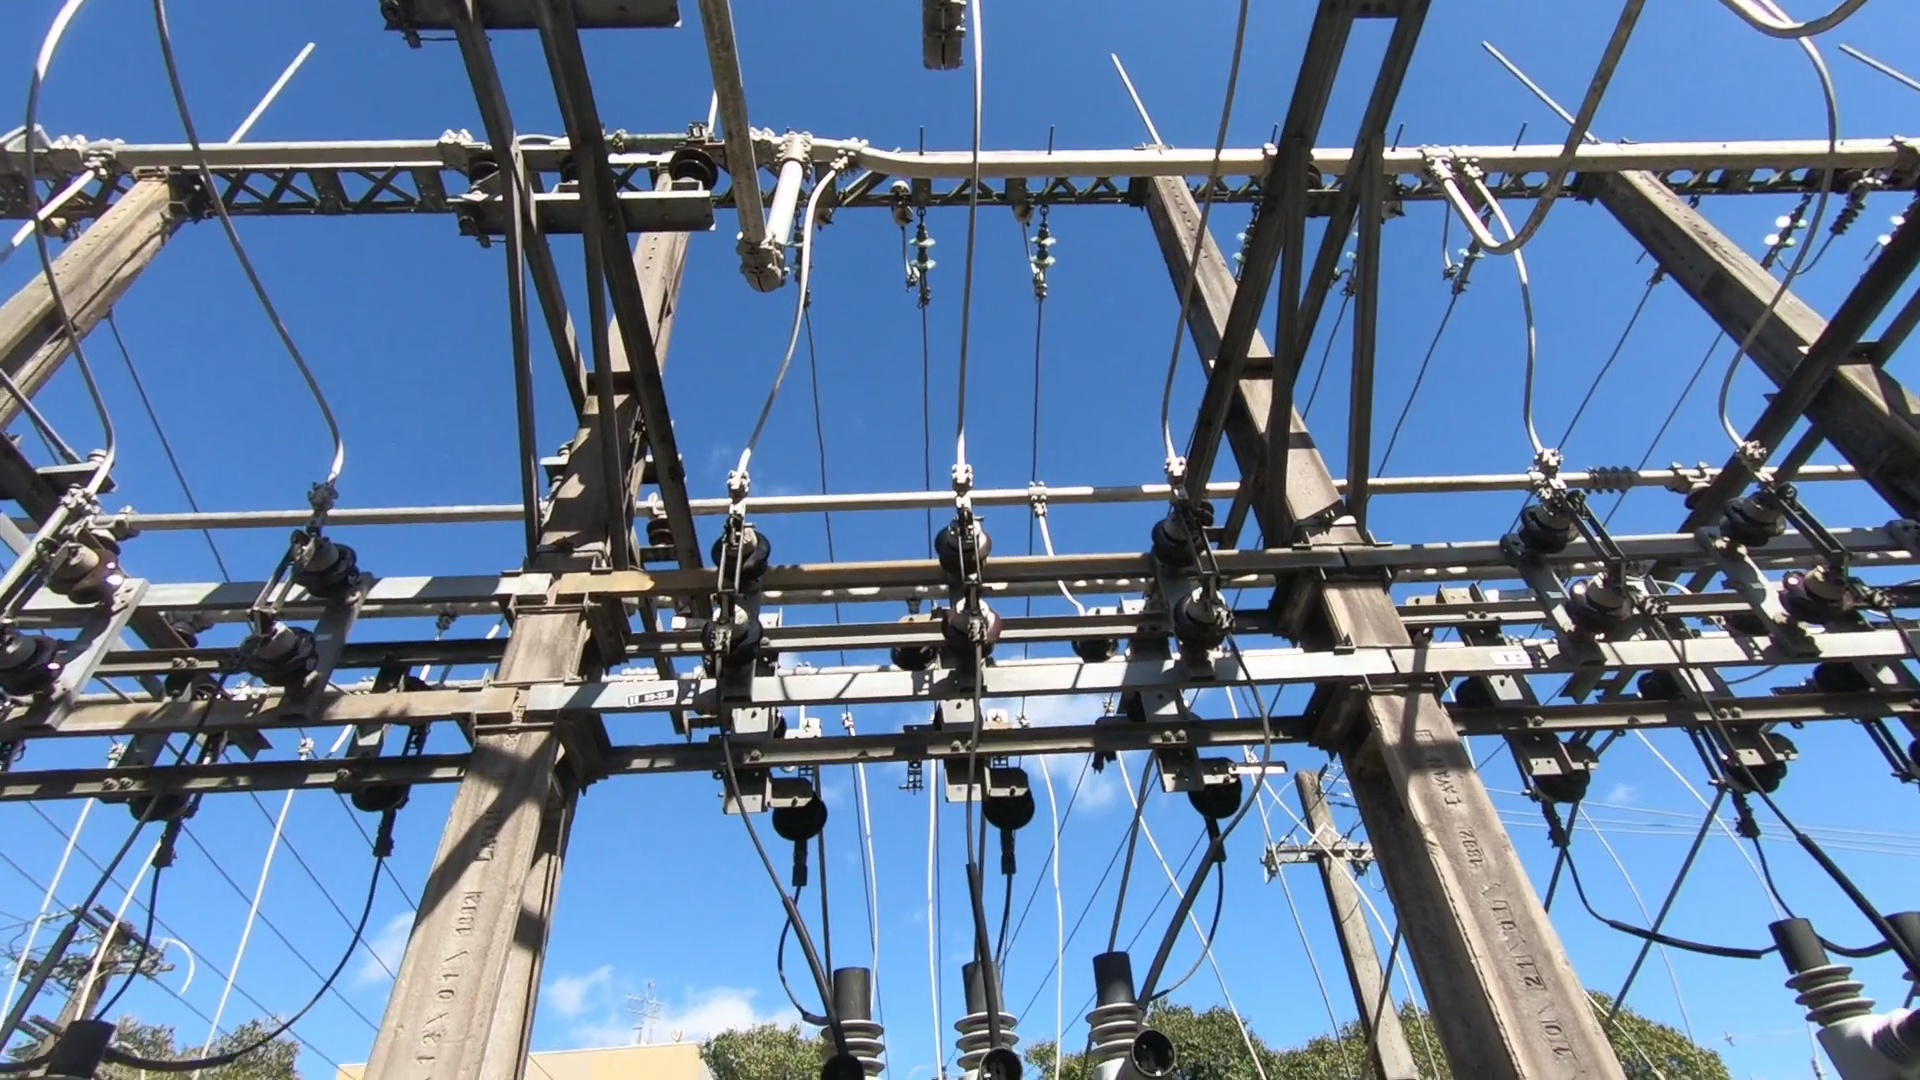


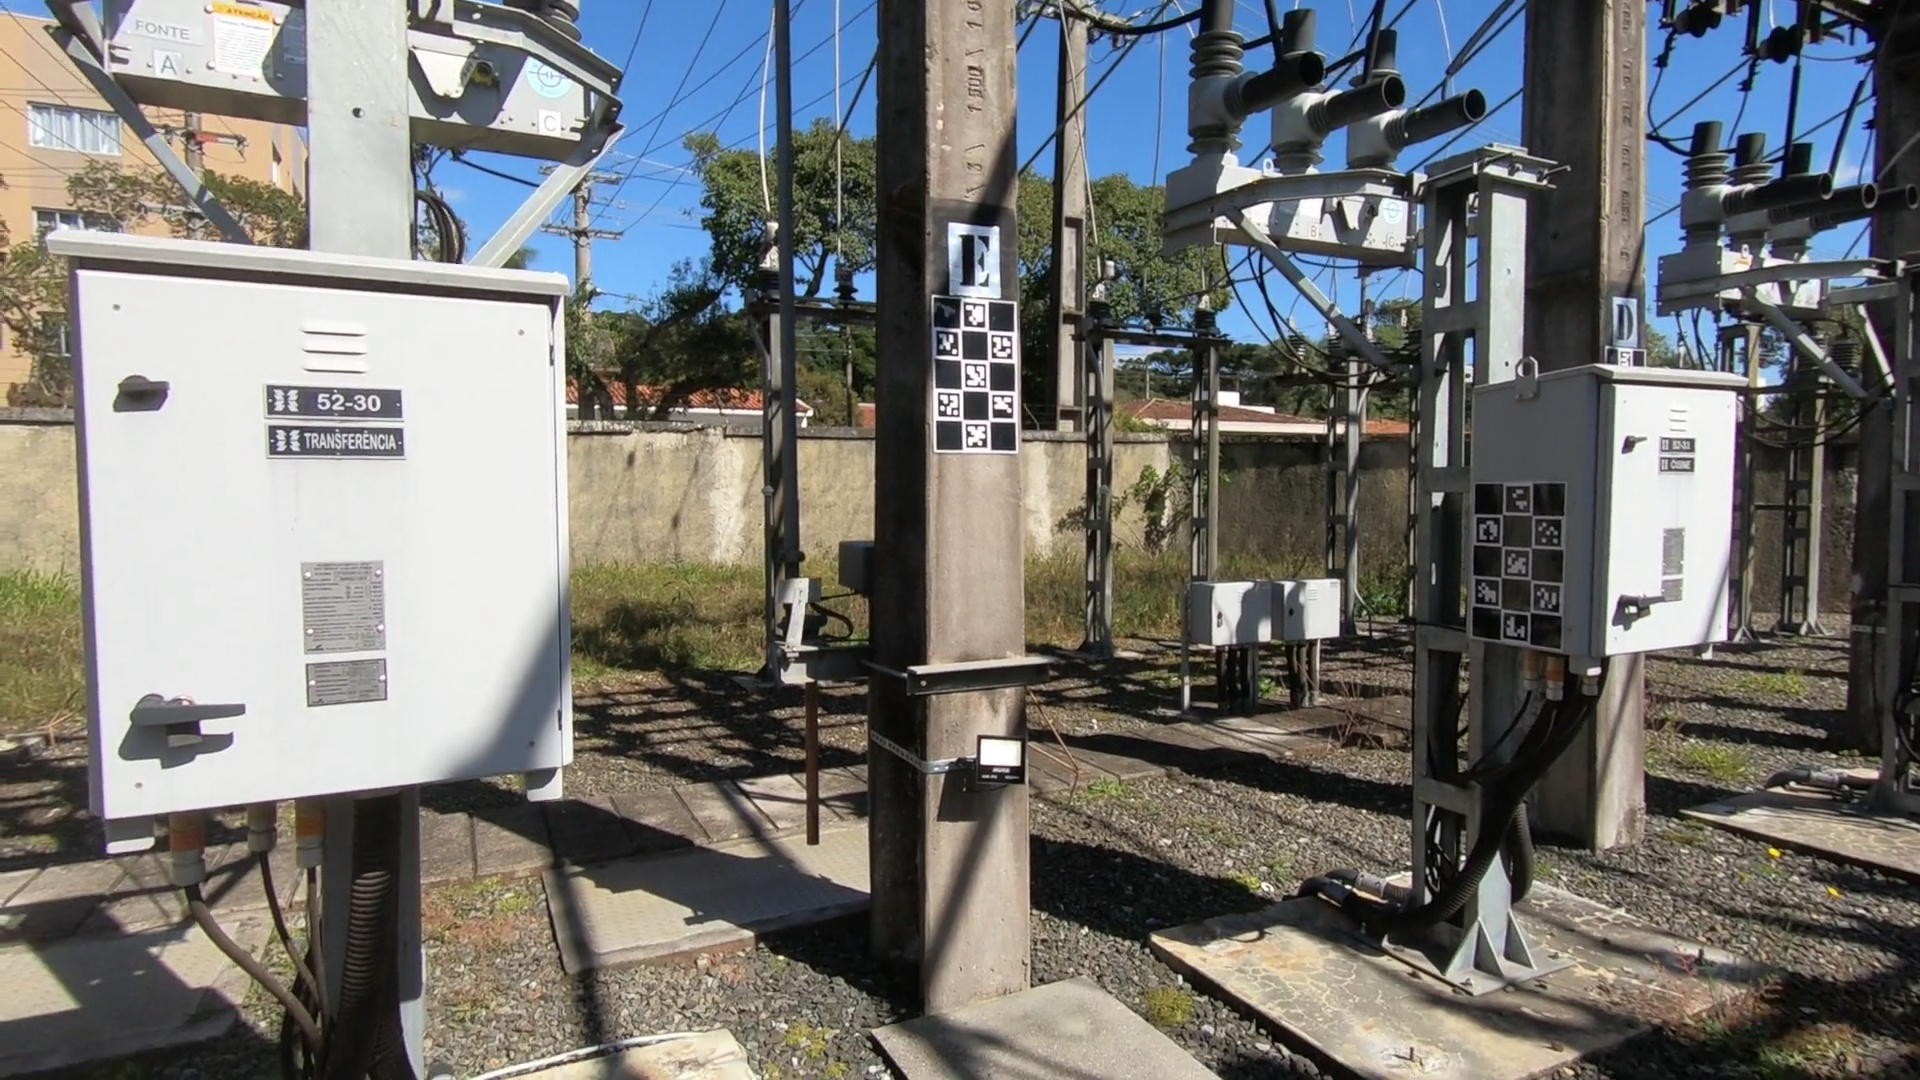

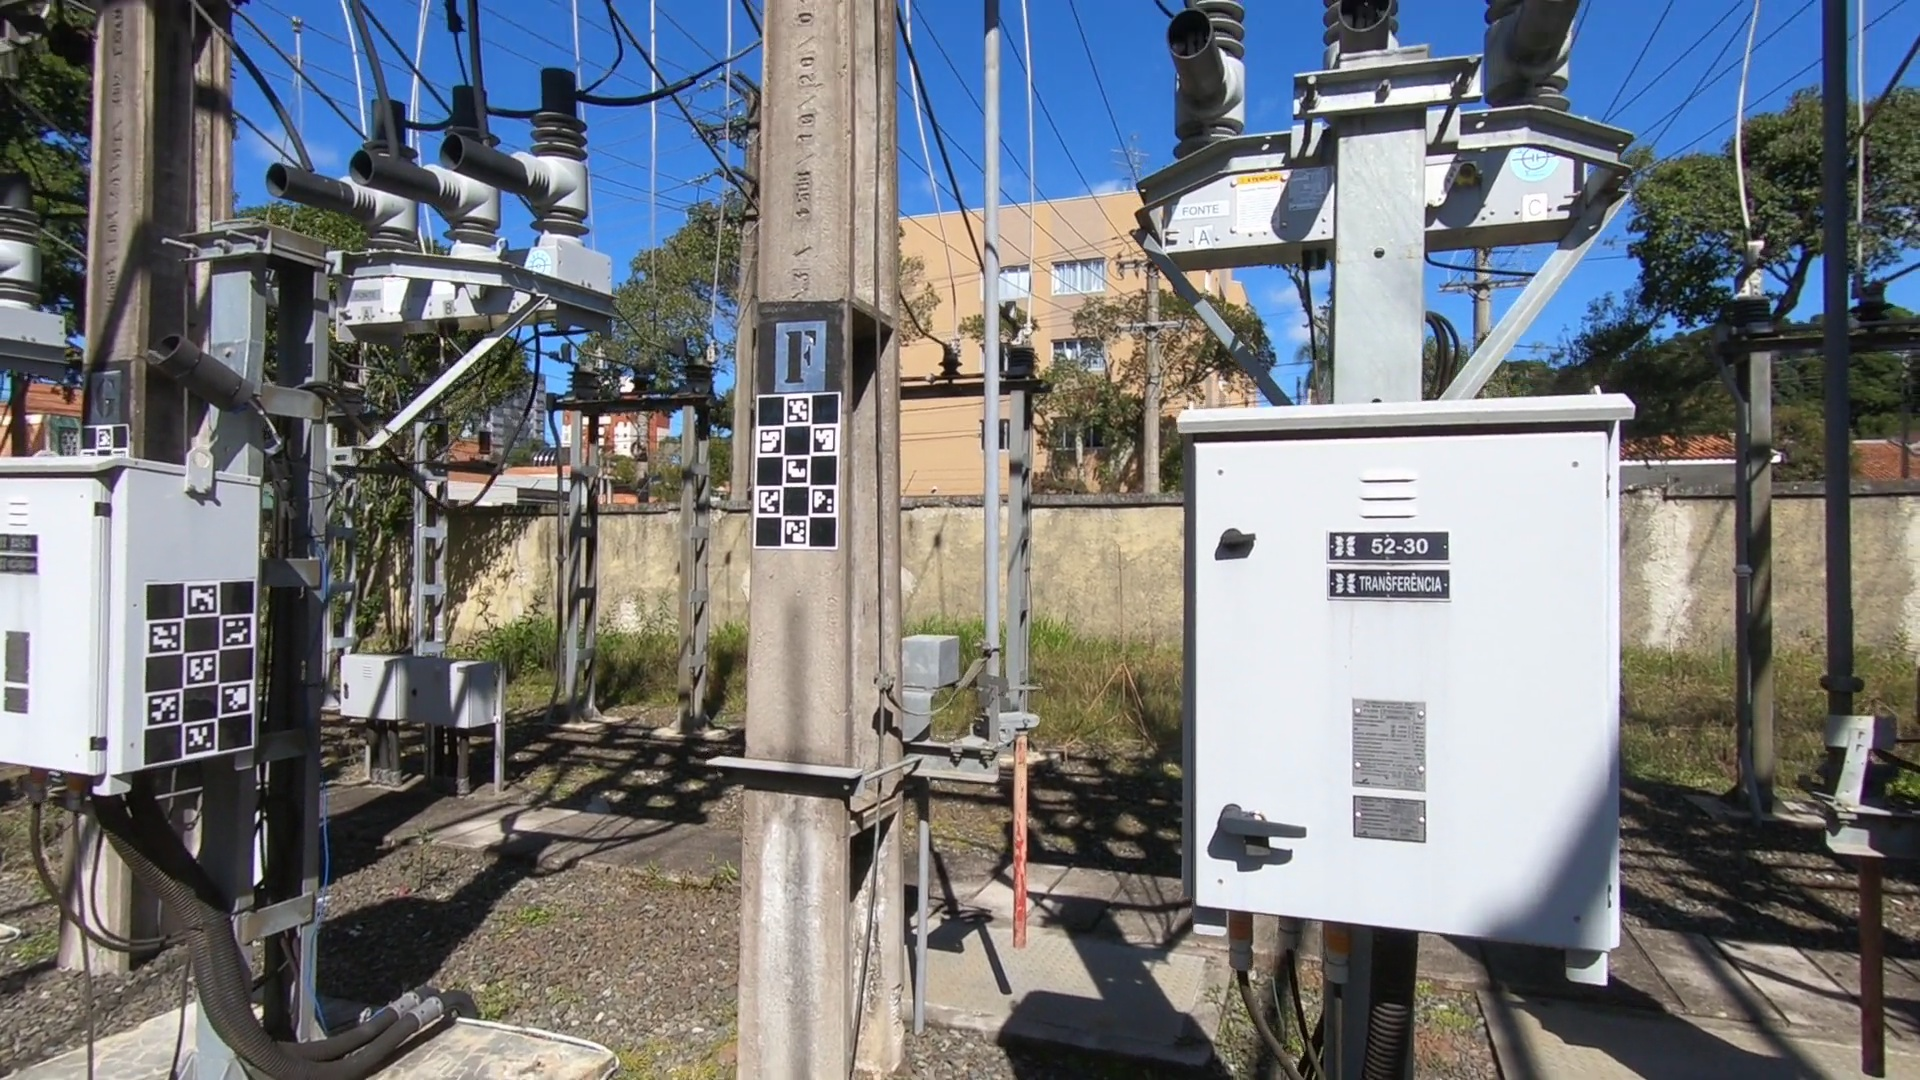

Abaixo realizamos a logica de verificar se foi identificado algum qrcode na imagem e as separando por pastas,
utilizando a biblioteca do Charuco.


Fail


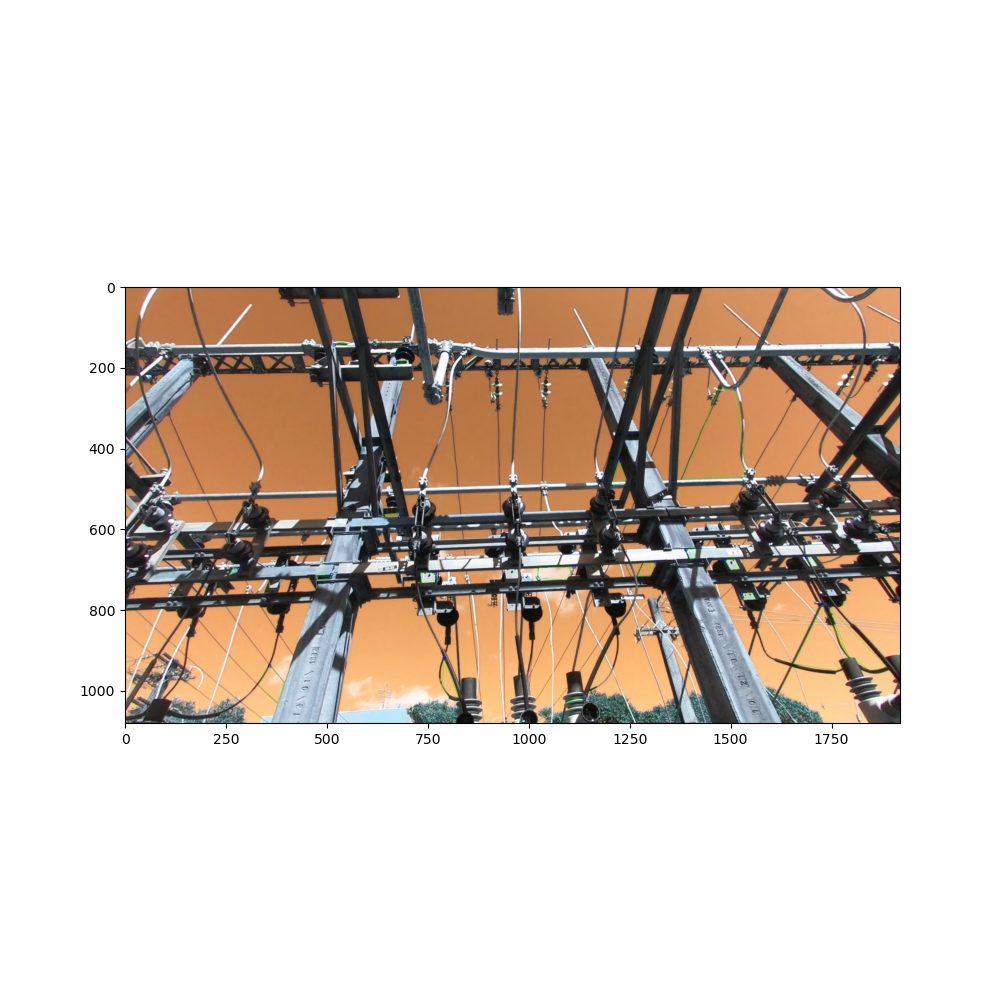

Sucess


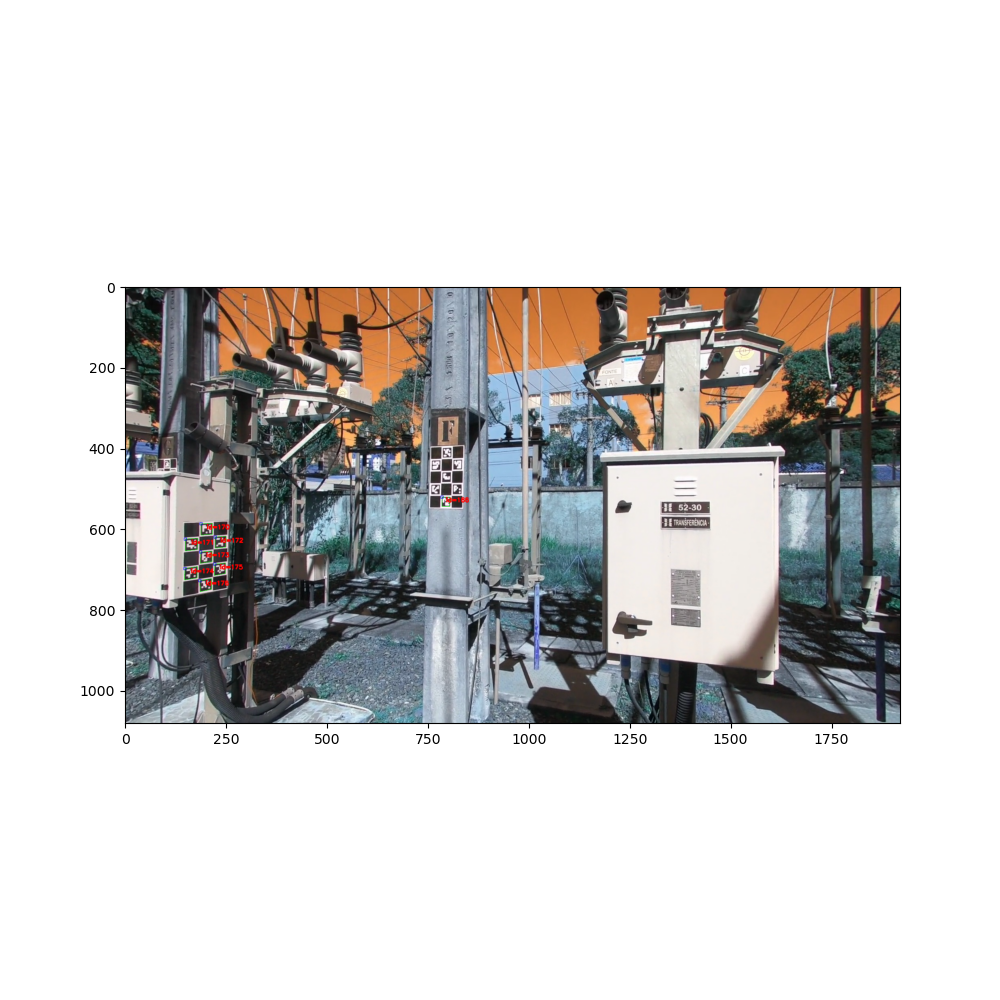

Sucess


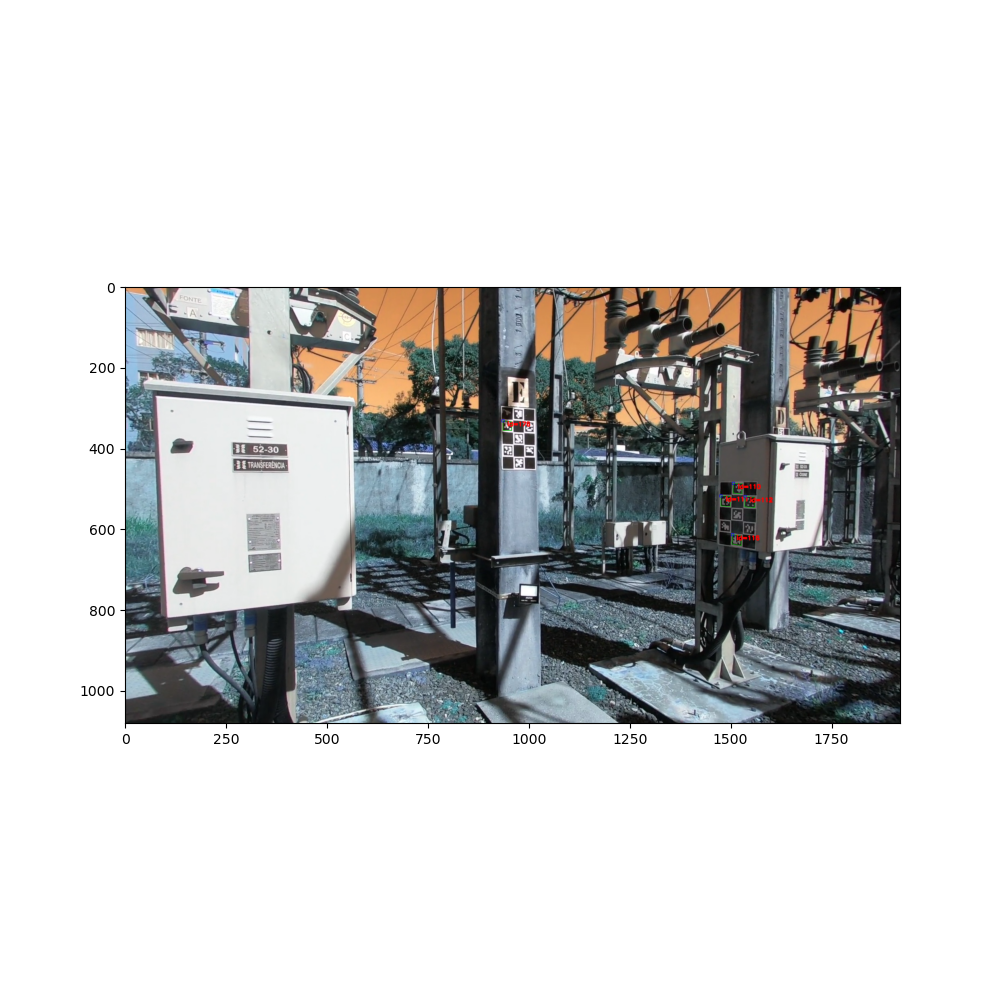

In [3]:
params.cornerRefinementMethod = cv2.aruco.CORNER_REFINE_NONE

for image in os.listdir(imgs_path):
    img_bgr = cv2.imread(str(imgs_path / image), cv2.IMREAD_COLOR)
    img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
    m_corners, m_ids, rejected_pts = cv2.aruco.detectMarkers(img_gray, dictionary, parameters=params)
    if m_ids is not None and len(m_ids) > 0:
        print("Sucess")
        img = cv2.aruco.drawDetectedMarkers(img_bgr, m_corners, m_ids)
        os.chdir(detected_path)
        cv2.imwrite(image, img)
        ok, c_corners, c_ids = cv2.aruco.interpolateCornersCharuco(m_corners, m_ids, img_gray, board)
        if c_ids is not None and len(c_ids) > 0:
            img = cv2.aruco.drawDetectedCornersCharuco(img, c_corners, c_ids, (0, 255, 0))
            os.chdir(detected_path)
            cv2.imwrite(image, img)
        plt.figure(figsize=(10,10))
        plt.imshow(img)
        plt.show()
    else:
        print("Fail")
        img = cv2.aruco.drawDetectedMarkers(img_bgr, rejected_pts)
        os.chdir(failed_path)
        cv2.imwrite(image, img)
        plt.figure(figsize=(10,10))
        plt.imshow(img)
        plt.show()
